# Telecom Churn - Case Study

#### By - Antra Prasad & Arindam Sarkar

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Understanding the Business Objective 

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Points 

-  Predict churn only on high-value customers
-  Predict usage-based definition to define churn
-  This project is based on the Indian and Southeast Asian market
-  Churn Phases
    -  In ‘good’ phase the customer is happy with the service and behaves as usual
    -  In ‘action’ phase The customer experience starts to sore in this phase
    -  In ‘churn’ phase the customer is said to have churned

### Step 1: Reading and Understanding the Data

In [1]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Setting the columns that can be displayed to max as 500 and rows to 300
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 300)

In [2]:
# lets import the dataset
telecom = pd.read_csv("../input/telecom-churn-data2/telecom_churn_data.csv")
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# lets check the dimensions of the dataset
telecom.shape
print("There are total %d columns." %telecom.shape[1])
print("There are total %d observations." %telecom.shape[0])

There are total 226 columns.
There are total 99999 observations.


In [4]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Step 2 : Data Cleaning

Lets separate our diff datatype columns inorder to perform better clearning and missing value treatment

In [6]:
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_vars =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9']

num_vars = [column for column in telecom.columns if column not in id_cols + date_cols + cat_vars]

In [7]:
#print("ID cols: %d\nDate cols:%d\nNumeric cols:%d\nCategory cols:%d" % (len(id_cols), len(date_cols), len(num_vars), len(cat_vars)))

#check if we have missed any column or not
#print(len(id_cols) + len(date_cols) + len(num_vars) + len(cat_vars) == telecom.shape[1])

In [8]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### Columns with meaningful missing values 

#### Immuting with zero 
For the below columns if values are missing that means no recharge done . Thus we can immute these missing values in these columns with 0.

In [9]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
        'max_rech_data_6','max_rech_data_7','max_rech_data_8']

telecom[zero_impute].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315,126.393392,126.729459,125.717301,124.94144,126.393392,126.729459,125.717301
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286,108.477235,109.765267,109.437851,111.36376,108.477235,109.765267,109.437851
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000,145.000000,145.000000,145.000000,145.00000,145.000000,145.000000,145.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000,177.000000,177.000000,179.000000,179.00000,177.000000,177.000000,179.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.00000,1555.000000,1555.000000,1555.000000


In [10]:
# impute missing values with 0
telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [11]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
count_rech_3g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
arpu_3g_8                   73.66
arpu_2g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
fb_user_8                   73.66
night_pck_user_8            73.66
count_rech_2g_8             73.66
std_ic_t2o_mou_9             7.75
roam_og_mou_9 

#### Replace NaN values in categorical variables with -1

We will replace missing values in the categorical variables i.e.
1. night_pck : Scheme to use during specific night hours only
2. FB_USER : Service scheme to avail services of Facebook and similar social networking sites

values with '-1' where '-1' will be a new category. 

In [12]:
# replace missing values with '-1' in categorical columns
telecom[cat_vars] = telecom[cat_vars].apply(lambda x: x.fillna(-1))

In [13]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)

arpu_3g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
arpu_3g_7                   74.43
arpu_2g_7                   74.43
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
arpu_2g_9                   74.08
arpu_3g_9                   74.08
count_rech_3g_9             74.08
count_rech_3g_8             73.66
arpu_2g_8                   73.66
arpu_3g_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_2g_8             73.66
loc_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
loc_og_t2c_mou_9             7.75
loc_og_t2f_mou_9             7.75
isd_ic_mou_9                 7.75
std_og_mou_9                 7.75
std_ic_t2o_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2c_mou_9             7.75
std_ic_t2t_mou

### Dropping columns with high null value % 

In [14]:
cols = list(telecom.apply(lambda column: True if column.isnull().sum()/telecom.shape[0] < 0.7 else False))
telecom = telecom.loc[:,cols]

In [15]:
telecom.shape

(99999, 206)

### Dropping values with zero variance 

i.e. having only one value which will be of no significance in model building and prediction

In [16]:
col_list = telecom.loc[:,telecom.apply(pd.Series.nunique) == 1]
col_list.head(5)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#Remove Columns with only 1 unique value
telecom = telecom.loc[:,telecom.apply(pd.Series.nunique) != 1]
telecom.shape

(99999, 190)

In [18]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)


std_og_mou_9           7.75
loc_og_t2m_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_ic_t2f_mou_9       7.75
loc_og_t2t_mou_9       7.75
std_og_t2t_mou_9       7.75
spl_ic_mou_9           7.75
roam_og_mou_9          7.75
loc_og_mou_9           7.75
loc_ic_t2m_mou_9       7.75
loc_og_t2c_mou_9       7.75
roam_ic_mou_9          7.75
std_og_t2m_mou_9       7.75
og_others_9            7.75
loc_ic_mou_9           7.75
offnet_mou_9           7.75
spl_og_mou_9           7.75
isd_og_mou_9           7.75
onnet_mou_9            7.75
loc_og_t2f_mou_9       7.75
std_og_t2f_mou_9       7.75
std_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
isd_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2f_mou_9       7.75
ic_others_9            7.75
loc_og_mou_8           5.38
ic_others_8            5.38
std_og_t2m_mou_8       5.38
spl_og_mou_8           5.38
loc_ic_mou_8           5.38
std_og_t2f_mou_8       5.38
std_ic_t2t_mou_8       5.38
isd_og_mou_8           5.38
std_og_mou_8        

#### Dropping the date columns as it is of no use for analysis

In [19]:
telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],axis = 1,inplace = True)        


In [20]:
telecom.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2

#### Dropping the id columns as it is of no use for analysis

In [21]:
telecom.drop('mobile_number',axis = 1,inplace = True)        

* Lets first extract the high value customers before we perform anyother operations on data due to it's huge volume.
* High value customers will take lesser time in computation as compare to whole data.
* **Filter high-value customers**:As mentioned, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).pip install fancyimpute

### Filter High Value Customers

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.


####  Derived feature  - Total data recharge amount 

*  first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
*  second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)

We will introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x

In [22]:
telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

In [23]:
# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them
telecom.drop(['total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8'],axis = 1,inplace = True)

 #### Derived Feature - recharge amount (total data recharge + total recharge)

In [24]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom['rech_amt_6'] = telecom.total_rech_amt_6 + telecom.total_rech_data_amt_6
telecom['rech_amt_7'] = telecom.total_rech_amt_7 + telecom.total_rech_data_amt_7
telecom['rech_amt_8'] = telecom.total_rech_amt_8 + telecom.total_rech_data_amt_8


In [25]:
# calculate average recharge done by customer in June and July
telecom['rech_amt_6n7'] = (telecom['rech_amt_6']  + telecom['rech_amt_7'])/2

In [26]:
# look at the 70th percentile recharge amount

pertile = np.percentile(telecom['rech_amt_6n7'], 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pertile)


70 percentile of 6th and 7th months avg recharge amount:  478.0


#### Filter High Value Customer

In [27]:
high_val_cust = telecom[telecom['rech_amt_6n7'] >= pertile]
print('Dataframe Shape after Filtering HIgh Value Customers: ', high_val_cust.shape)


Dataframe Shape after Filtering HIgh Value Customers:  (30001, 186)


**So now we have our high value customers data. And we will predict churn only on high-value customers.**

### Immuting the missing values using FancyImpute

In [28]:
#!pip install fancyimpute

In [29]:
high_val_cust_cols = high_val_cust.columns

# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
imputed = MICE().fit_transform(high_val_cust)

In [30]:
# convert imputed numpy array to pandas dataframe
high_val_cust = pd.DataFrame(imputed, columns=high_val_cust_cols)
print(high_val_cust.isnull().sum()*100/high_val_cust.shape[0])

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou_9         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou

### Derive churn Column ( Target Variable)

**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In [31]:
# calculate total incoming and outgoing calls 
high_val_cust['total_calls_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_9

In [32]:
# calculate 2g and 3g data consumption
high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9

#### Derived feature  - Churn

In [33]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn

high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [34]:
high_val_cust = high_val_cust.drop(['total_calls_9', 'total_internet_mb_9'], axis=1)

In [35]:
# change data type to category
high_val_cust .churn = high_val_cust .churn.astype("category")

In [36]:
# lets find out churn/non churn percentage

print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

0    91.863605
1     8.136395
Name: churn, dtype: float64


**91% of the customers do not churn, this might be a case of class imbalance, we will treat it later**

#### Deleting columns that belong to the churn month (9th month) 

In [37]:
# delete all variables relating to 9th month
high_val_cust = high_val_cust.filter(regex='[^9]$', axis=1)
high_val_cust.shape

(30001, 142)

#### Derived features - average  of 6th & 7th months

In [38]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months

high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)
    
high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)


high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

high_val_cust['total_rech_data_amt']=high_val_cust.rech_amt_8 - high_val_cust.rech_amt_6n7

### Outlier Treatment 

In [39]:
#lets get the all null values of all columns in percentage, it would be better to look in terms of percentage
round(100*(high_val_cust.isnull().sum()/len(high_val_cust.index)), 2).sort_values(ascending=False)

total_rech_data_amt      0.0
loc_ic_t2f_mou_6         0.0
loc_ic_t2m_mou_7         0.0
loc_ic_t2m_mou_6         0.0
loc_ic_t2t_mou_8         0.0
loc_ic_t2t_mou_7         0.0
loc_ic_t2t_mou_6         0.0
total_og_mou_8           0.0
total_og_mou_7           0.0
total_og_mou_6           0.0
og_others_8              0.0
og_others_7              0.0
og_others_6              0.0
spl_og_mou_8             0.0
spl_og_mou_7             0.0
spl_og_mou_6             0.0
isd_og_mou_8             0.0
isd_og_mou_7             0.0
isd_og_mou_6             0.0
loc_ic_t2m_mou_8         0.0
loc_ic_t2f_mou_7         0.0
vol_3g_mb_diff           0.0
loc_ic_t2f_mou_8         0.0
total_ic_mou_7           0.0
total_ic_mou_6           0.0
std_ic_mou_8             0.0
std_ic_mou_7             0.0
std_ic_mou_6             0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_6         0.0
std_ic_t2t_mou

In [40]:
cat_vars =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']

num_vars = [column for column in high_val_cust.columns if column not in cat_vars]

In [41]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
high_val_cust.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
arpu_6,30001.0,558.490824,460.640461,-2258.709000,309.865000,481.6940,699.943000,994.099000,1240.964000,1985.115000,27731.088000
arpu_7,30001.0,560.782203,479.776947,-2014.045000,309.826000,480.9430,698.315000,995.859000,1261.272000,1999.500000,35145.834000
arpu_8,30001.0,508.597957,501.961981,-945.808000,231.473000,427.5850,661.491000,977.345000,1255.019000,1986.622000,33543.624000
onnet_mou_6,30001.0,256.658523,462.984189,-279.785525,17.080000,84.5800,290.440000,754.160000,1135.440000,2151.740000,7376.710000
onnet_mou_7,30001.0,264.417601,482.556152,-685.304380,16.030000,82.8100,290.240000,784.480000,1185.790000,2201.960000,8157.780000
onnet_mou_8,30001.0,226.043842,464.299112,-950.105725,10.390000,65.6100,239.960000,665.080000,1074.590000,2159.110000,10752.560000
offnet_mou_6,30001.0,379.128021,479.962682,0.000000,80.710000,237.0900,487.940000,895.830000,1256.610000,2326.360000,8362.360000
offnet_mou_7,30001.0,383.404329,496.448742,0.000000,78.530000,233.3100,494.010000,916.080000,1272.290000,2410.890000,9667.130000
offnet_mou_8,30001.0,345.282424,477.604970,-18.550033,63.160000,212.9900,438.890000,823.680000,1167.540000,2193.130000,14007.340000
roam_ic_mou_6,30001.0,16.758591,76.346540,-55.718123,0.000000,0.0000,0.000000,33.660000,85.430000,342.440000,2613.310000


#### Cappping the outliers

In [42]:

num_vars.remove('churn')

In [43]:
for col in high_val_cust[num_vars]:
    percentiles = high_val_cust[col].quantile([0.01,0.99]).values
    high_val_cust[col][high_val_cust[col] <= percentiles[0]] = percentiles[0]
    high_val_cust[col][high_val_cust[col] >= percentiles[1]] = percentiles[1]

In [44]:
# Checking outliers at 25%,50%,75%,90%,95% and 99% after capping outliers 
high_val_cust.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
arpu_6,30001.0,548.809784,358.130151,1.000000,309.865000,481.6940,699.943000,994.099000,1240.964000,1985.115000,1985.115000
arpu_7,30001.0,551.084737,360.433210,0.700000,309.826000,480.9430,698.315000,995.859000,1261.272000,1999.500000,1999.500000
arpu_8,30001.0,498.243103,383.295094,0.000000,231.473000,427.5850,661.491000,977.345000,1255.019000,1986.622000,1986.622000
onnet_mou_6,30001.0,248.058618,407.190926,-228.039829,17.080000,84.5800,290.440000,754.160000,1135.440000,2151.740000,2151.740000
onnet_mou_7,30001.0,255.263286,420.977448,-189.426334,16.030000,82.8100,290.240000,784.480000,1185.790000,2201.960000,2201.960000
onnet_mou_8,30001.0,216.896855,397.416281,-207.127729,10.390000,65.6100,239.960000,665.080000,1074.590000,2159.110000,2159.110000
offnet_mou_6,30001.0,371.327139,431.451435,0.000000,80.710000,237.0900,487.940000,895.830000,1256.610000,2326.360000,2326.360000
offnet_mou_7,30001.0,374.818155,441.238953,0.000000,78.530000,233.3100,494.010000,916.080000,1272.290000,2410.890000,2410.890000
offnet_mou_8,30001.0,335.244952,404.753196,0.000000,63.160000,212.9900,438.890000,823.680000,1167.540000,2193.130000,2193.130000
roam_ic_mou_6,30001.0,14.223865,49.436918,0.000000,0.000000,0.0000,0.000000,33.660000,85.430000,342.440000,342.440000


## Data Visualization

#### Churn - Target Variable

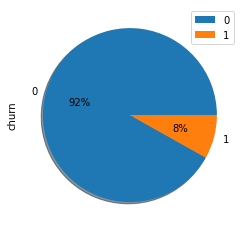

In [45]:
high_val_cust['churn'].value_counts().plot.pie(autopct = "%1.0f%%",legend = True,shadow=True,)

#### arpu (Average Revenue per user)

Text(0.5, 1.0, 'Non-Churn')

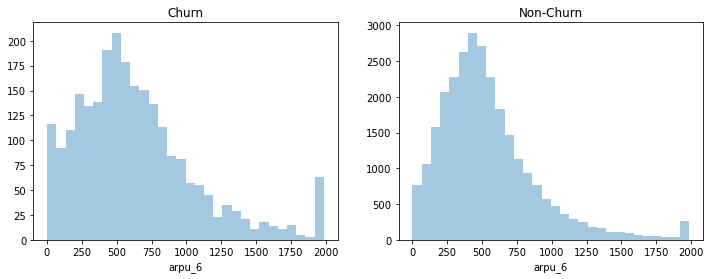

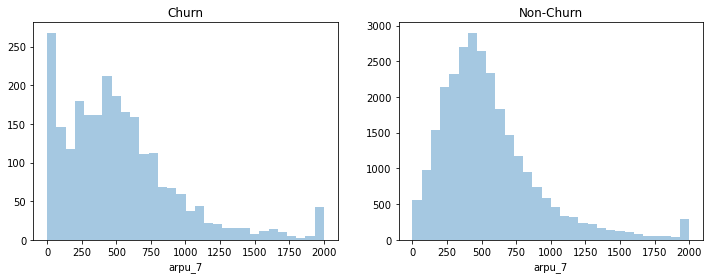

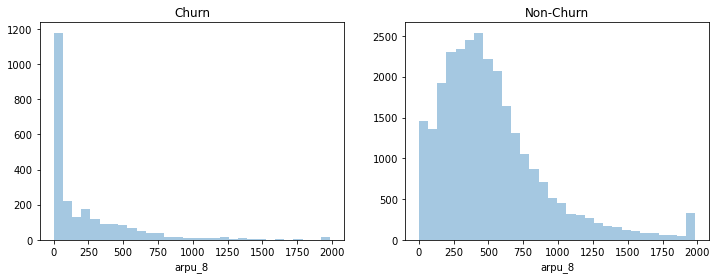

In [46]:
afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].arpu_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].arpu_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')


#### Offnet_mou (Calls outside of the operator network)

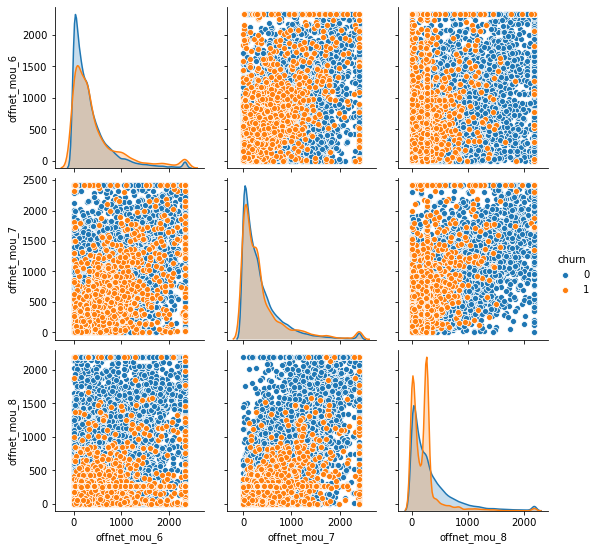

In [47]:
sns.pairplot(data=high_val_cust[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

####  Relationship btw total_ic_mou and total_og_mou ( Total incoming/outgoing minutes of usage ) 

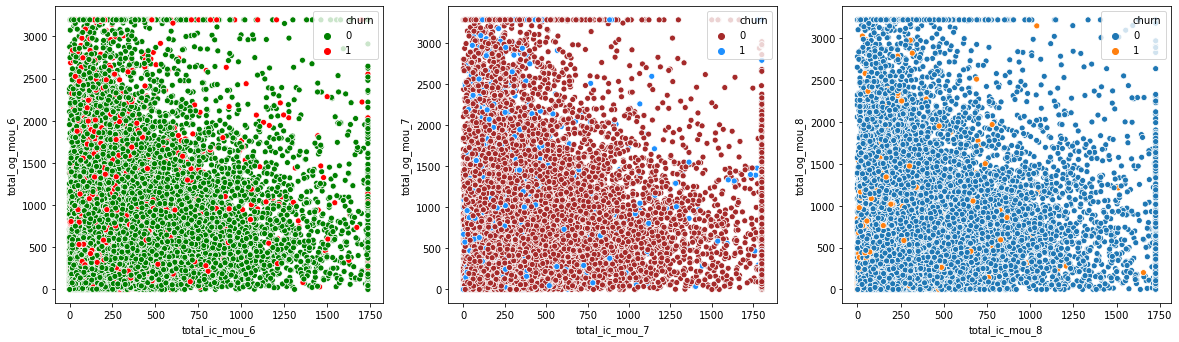

In [48]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.scatterplot(x = 'total_ic_mou_6', y = 'total_og_mou_6', hue='churn', data = high_val_cust, palette=['green','red'])
plt.subplot(2,3,2)
sns.scatterplot(x = 'total_ic_mou_7', y = 'total_og_mou_7', hue='churn',data = high_val_cust, palette=['brown','dodgerblue'])
plt.subplot(2,3,3)
sns.scatterplot(x = 'total_ic_mou_8', y = 'total_og_mou_8',hue='churn',  data=high_val_cust)


#### rech_amt_6 (Recharge amount : derived feature -> total data recharge + total call recharge)

Text(0.5, 1.0, 'Non-Churn')

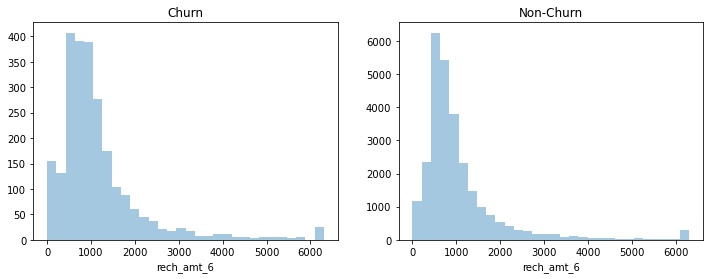

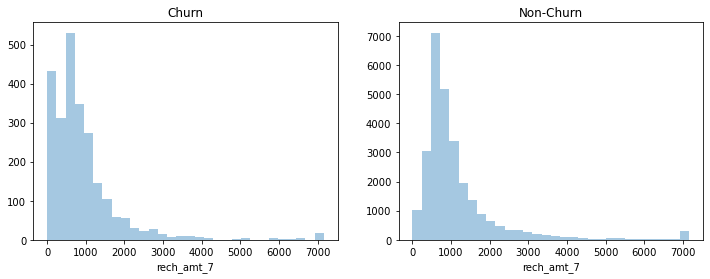

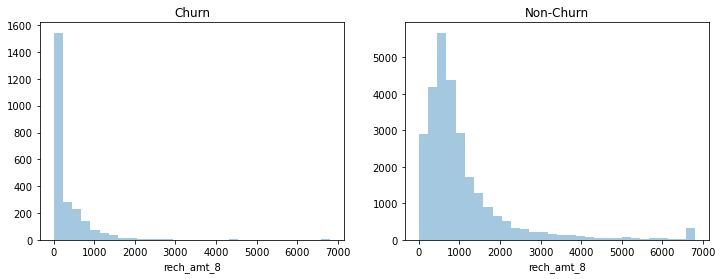

In [49]:
afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_7, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_7, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

afig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(high_val_cust[high_val_cust['churn']==1].rech_amt_8, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(high_val_cust[high_val_cust['churn']==0].rech_amt_8, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')


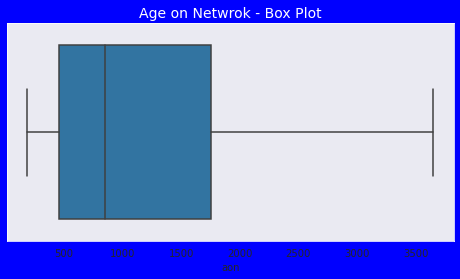

In [123]:
# Lets see distribution of same fields in each motnh using box plot.
# Quantitative Variables

plt.figure(figsize=(8,4),facecolor='b')
sns.set_style("dark")
ax = sns.boxplot(high_val_cust['aon'])
ax.set_title('Age on Netwrok - Box Plot',fontsize=14,color='w')
plt.show()

In [124]:
#sum of total isd MOU per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
churn,,,
0,-73085.428926,-70910.385540,-73667.686411
1,-32369.223635,-56902.446194,-182036.896892


In [125]:
#mean of total 3G usage per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,324.870308,359.087770,349.541262
1,261.058263,203.804617,79.410115


In [126]:
#mean of total 2G usage per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,120.348160,120.280360,104.761739
1,105.310045,82.574322,21.870037


In [127]:
#mean of total std MOU per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['std_og_mou_6','std_og_mou_7','std_og_mou_8'].mean()

,std_og_mou_6,std_og_mou_7,std_og_mou_8
churn,,,
0,320.383399,347.576361,312.227497
1,590.798739,484.794276,224.026162


In [128]:
#sum of total special MOU per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
churn,,,
0,145331.712467,202738.098027,190987.719053
1,15941.382666,32821.941524,53208.666331


In [129]:
#mean of total incoming MOU per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,287.853953,299.130776,291.632478
1,224.527112,178.565875,63.434338


In [130]:
#mean of total outgoing MOU per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,585.422042,618.298418,570.257428
1,767.384002,611.087497,206.561434


In [131]:
#mean of total monthly recharge per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,638.577213,651.973041,600.241255
1,759.241704,608.304383,246.349037


In [132]:
#mean of outgoing in roaming usage per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'].mean()

,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8
churn,,,
0,21.833157,15.034027,14.988971
1,40.715727,40.271917,47.417858


In [133]:
#mean of maximum recharge amount per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,166.658926,170.622714,163.926161
1,167.346170,152.213847,81.455551


In [135]:
#mean of last recharge amount churn vs Non-Churn
high_val_cust.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,96.741074,98.631930,92.879644
1,96.848423,73.226546,31.712413


In [136]:
#mean of local outgoing on same network usage per month churn vs Non-Churn
high_val_cust.groupby(['churn'])['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'].mean()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8
churn,,,
0,75.037567,77.072153,71.580091
1,39.110327,20.658537,-53.525364


In [137]:
#mean of age on network churn vs Non-Churn
high_val_cust.groupby(['churn'])['aon'].mean()

churn
0    1239.533781
1     861.022941
Name: aon, dtype: float64

#### We can observe below points from above data analysis:

 - incoming calls were reduced in action phase i.e. in august
 - outgoing calls were reduced in action phase i.e. in august
 - total recharge amount reduced in action phase i.e. in august
 - total data recharge reduced in action phase i.e. in august
 - Reuction is not just normal but significant.
 - Those who churned were customers who used services for less days as compared to customers who didn't churn.
 - Overall most of the services that customer was using, reduced to low in action phase 8th month.

#### Heatmap/Correlation Table

Due to presence of so many variables Heatmap/Pairplot on entire data will not make sense . Lets try Correlation table

In [50]:
corr=high_val_cust.corr()
corr

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_amt_6n7,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_amt
arpu_6,1.000000,0.595966,0.506669,0.431584,0.273058,0.232760,0.593849,0.395104,0.353615,0.144137,0.123834,0.136959,0.202355,0.157484,0.162484,0.274731,0.205460,0.179118,0.409016,0.320222,0.293087,0.193860,0.161597,0.143606,0.061630,-0.004006,0.017898,0.431825,0.333923,0.297316,0.326762,0.194300,0.165284,0.363476,0.225025,0.191377,0.092305,0.076684,0.073994,0.466826,0.281974,0.234502,0.143742,0.035565,-0.001260,0.138975,0.037551,0.053900,0.147663,-0.016320,0.014242,0.665922,0.433313,0.364593,0.187512,0.137775,0.120270,0.253130,0.205380,0.179976,0.072976,0.072265,0.067199,0.256037,0.201842,0.176693,0.202126,0.127475,0.103897,0.177216,0.123259,0.116282,0.064001,0.050327,0.048484,0.211758,0.143275,0.128074,0.300707,0.224437,0.196336,0.115076,0.019165,-0.011662,0.106800,0.071666,0.068406,0.063500,0.046141,0.048731,0.415430,0.155478,0.132178,0.938769,0.568259,0.491192,0.337304,0.224775,0.255371,0.268782,0.173486,0.191740,0.055125,-0.051490,0.005533,-0.095570,-0.145958,-0.115344,0.133609,0.043408,0.060161,-0.135393,-0.232175,-0.146151,-0.044651,-0.100762,-0.072346,-0.207201,-0.255164,-0.200036,0.180304,0.072470,0.106939,-0.031453,-0.068474,-0.051900,-0.149253,-0.246142,-0.167364,0.057704,0.047694,0.047927,0.110846,0.045242,0.023809,-0.095241,-0.045856,0.457042,0.154785,0.180590,0.341688,-0.309766,-0.202708,-0.252011,-0.018516,-0.058977,-0.180668,-0.235151,-0.077084,-0.016335,-0.274609,-0.099731,-0.087662,-0.039034,-0.068682,-0.117672,-0.215491,-0.275200,-0.049840,0.000773,0.022882,-0.033706,-0.115760
arpu_7,0.595966,1.000000,0.696617,0.279944,0.424714,0.363858,0.408347,0.578747,0.4

### Dummy variables

In [51]:
# Let's drop the first column 

dummy = pd.get_dummies(high_val_cust[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8']])
dummy = dummy.drop(['night_pck_user_6', 'fb_user_6'], 1)

In [52]:
high_val_cust = high_val_cust.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8'], 1)

In [53]:
# Add the results to the master dataframe
high_val_cust = pd.concat([high_val_cust, dummy], axis=1)

In [54]:
high_val_cust.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_amt_6,rech_amt_7,rech_amt_8,rech_amt_6n7,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,max_rech_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_rech_data_amt,night_pck_user_7,night_pck_user_8,fb_user_7,fb_user_8
0,197.385,214.816,213.803,-228.039829,-188.847294,0.00,300.660062,295.297235,0.00,30.968589,17.569935,0.00,35.088776,22.092567,0.00,-229.176477,-234.994267,0.00,203.881847,163.644855,0.00,6.083205,8.434504,0.00,2.550846,17.466298,0.00,-19.202747,-62.79564,0.00,59.742685,65.524513,0.00,182.692294,191.82863,0.00,2.370244,1.815662,0.00,244.752686,259.521888,0.00,-232.231671,-276.956594,0.00,6.044502,79.249648,0.00,0.753153,1.477479,0.0,0.00,0.00,0.00,-82.115833,-92.039635,0.16,137.856603,154.903222,4.13,33.156457,16.215932,1.15,88.834378,79.028033,5.44,-40.187487,-40.504758,0.00,29.825838,28.320178,0.00,2.767591,6.557499,0.00,-7.622245,-5.60536,0.00,0.00,0.00,5.44,-92.235305,-85.724584,0.0,10.084117,9.061593,0.00,1.658995,3.440036,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,7.7025,208.884706,-297.978649,-24.269262,-28.590671,41.170273,-252.137287,116.186092,-40.79,0.000,-78.491206,6.613802,-9.572855,42.841384,5.440,-1.5,-55.0,0.0,0.0,-9.975,-7.555,-55.0,0.0,0.0,1.0,1.0
1,1069.180,1349.850,1986.622,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.230000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.630000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.000000,0.00,422.160000,533.91000,255.79,4.300000,23.290000,12.01,49.890000,31.76000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,4

## Model Building

We will be having 2 kinds of model:
* Interpretable Model
* Non-Interpretable Model ( with PCA )

For non-Interpretable models , we are passing train and test data post SMOTE, RFE (163 -> 120 ) and PCA(120 -> 60) 


### Splitting Data into Training and Test Sets

In [55]:
# change churn to numeric
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [56]:
# divide data into train and test
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4,stratify = y)
# print shapes of train and test sets
X_train.shape

(21000, 161)

In [57]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'total_rech_amt_diff', 'max_rech_amt_diff', 'max_rech_data_diff',
       'vol_2g_mb_diff', 'vol_3g_mb_diff', 'total_rech_data_amt',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_7', 'fb_user_8'],
      dtype='object', length=161)

### Scaling Data

In [58]:
#perform minmax scaling before PCA

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
# fit transform the scaler on train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
# transform test using the already fit scaler
X_test[num_vars] = scaler.transform(X_test[num_vars])

### SMOTE

In [60]:
#SMOTE to correct class imbalance
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

#Now we have balanced dataset

Dimension of X_tr Shape: (38582, 161)
Dimension of y_tr Shape: (38582,)
Imbalance in Training dataset: 1.0


### RFE to eliminate some features 

In [61]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE

# lets RFE select 150 most imp features for us
rfe = RFE(lr, 150)   
rfe = rfe.fit(X_tr, y_tr)

In [62]:
X_train_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]

In [63]:
X_test_rfe=X_test[X_train_rfe.columns]

In [64]:
X_test.shape

(9001, 161)

### PCA to reduce dimensionality further 

In [65]:
#lets perform PCA on sampled data. import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [66]:
#lets fit PCA on the train dataset
pca.fit(X_train_rfe)
pca.explained_variance_ratio_

array([3.23053460e-01, 1.27736103e-01, 7.20702968e-02, 5.09366220e-02,
       4.62180309e-02, 3.53547794e-02, 2.96533040e-02, 2.53548011e-02,
       2.10756743e-02, 1.77559199e-02, 1.58092215e-02, 1.25278172e-02,
       1.07119147e-02, 9.79386899e-03, 9.18191244e-03, 8.18954737e-03,
       7.67126344e-03, 7.60191633e-03, 6.96469204e-03, 6.34164116e-03,
       5.97210623e-03, 5.91534520e-03, 5.68417714e-03, 5.41715960e-03,
       5.29130026e-03, 5.10719942e-03, 4.78154179e-03, 4.66148581e-03,
       4.44732906e-03, 4.19031052e-03, 3.93279927e-03, 3.81702112e-03,
       3.64882074e-03, 3.39440607e-03, 3.26417598e-03, 3.08447540e-03,
       3.03311266e-03, 3.01566984e-03, 2.94548862e-03, 2.70982837e-03,
       2.64870056e-03, 2.52056025e-03, 2.49632251e-03, 2.43208833e-03,
       2.35279951e-03, 2.14387857e-03, 2.07746499e-03, 2.02554467e-03,
       1.99285977e-03, 1.95439928e-03, 1.82902759e-03, 1.78374848e-03,
       1.75127927e-03, 1.67742708e-03, 1.62796397e-03, 1.56435584e-03,
      

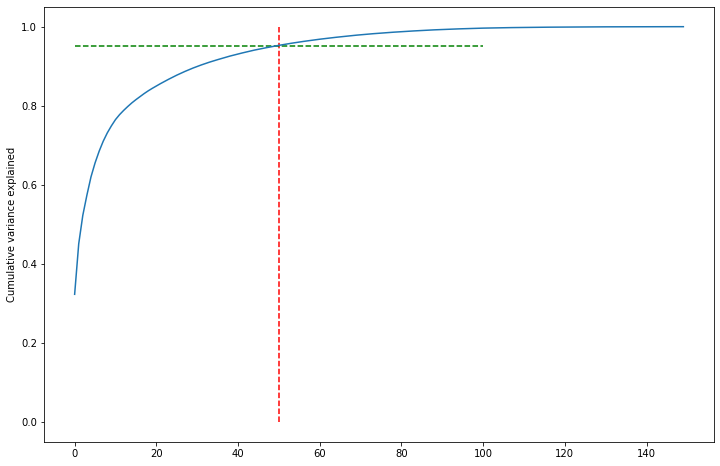

In [67]:
#lets draw screeplot in between cumulative variance and number of components
%matplotlib inline

fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Cumulative variance explained")
plt.show()

**approx 50 components explain  more than 95% variance**

So we will go with 50 componenets 

In [68]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=50)

In [69]:
#fit
X_train_pca = pca_again.fit_transform(X_train_rfe)
X_train_pca.shape

(38582, 50)

In [70]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.00685832263510721 , min corr:  -0.01193827919170882


As we can see correlations are close to 0. So no multicollinearity btw these components 

In [71]:
#Applying selected components to the test data - 45 components
X_test_pca = pca_again.transform(X_test_rfe)


In [72]:
X_test_pca.shape

(9001, 50)

In [73]:
X_train_pca.shape

(38582, 50)

##### This gives us an idea about the no of component we should choose for PCA

## Non-Interpretable Models

## MODEL 1 - Regularized Logistic Regression with PCA 

In [74]:
learner_pca = LogisticRegression()

model_pca = learner_pca.fit(X_train_pca, y_tr)

In [75]:
# predict churn on test data
pred_probs_test = model_pca.predict_proba(X_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))


'0.91'

Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.

### Hyperparameter tuning - Regularized Logistic Regression with PCA

AS , we have already taken care of imbalance /skewness using SMOTE , we need not to use weight parameter here

In [76]:
# PCA
pca = PCA()

logistic = LogisticRegression( )

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic),
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [40,60], 'logistic__C': [0.001, 0.01,0.1, 0.5, 1, 2, 3, 4, 5, 10,100], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [77]:
model.fit(X_train_rfe, y_tr)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   50.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5,
                                         10, 100],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [40, 60]},
             scoring='recall', verbose=1)

In [78]:
# cross validation results
pd.DataFrame(model.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.195289,0.041513,0.029877,0.004538,0.001,l2,40,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.790565,0.795802,0.793416,0.790306,0.809228,0.795863,0.006979,22
1,1.339728,0.027914,0.034467,0.005018,0.001,l2,60,"{'logistic__C': 0.001, 'logistic__penalty': 'l...",0.793675,0.796579,0.794712,0.791602,0.810783,0.797470,0.006848,21
2,1.165504,0.040273,0.031013,0.002328,0.01,l2,40,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.813116,0.817569,0.808191,0.806117,0.827890,0.814577,0.007755,20
3,1.502201,0.042001,0.033605,0.002099,0.01,l2,60,"{'logistic__C': 0.01, 'logistic__penalty': 'l2...",0.820373,0.819124,0.812856,0.812338,0.832815,0.819501,0.007398,19
4,1.222693,0.031169,0.032971,0.004419,0.1,l2,40,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.828149,0.824566,0.819336,0.820632,0.840591,0.826655,0.007624,18


In [79]:
# print best hyperparameters
print("Score: ", model.scorer_)
print("Best hyperparameters: ", model.best_params_)

Score:  make_scorer(recall_score, average=binary)
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [80]:
# hyperparameter space
params = {'logistic__C':[3], 'logistic__penalty': ['l2'],'pca__n_components': [60]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [81]:
model.fit(X_train_rfe, y_tr)
# predict churn on test data
y_pred = model.predict(X_test_rfe)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished


[[7005 1264]
 [ 125  607]]


In [82]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.83
Specificity: 	0.85


In [83]:
# check area under curve
y_pred_prob = model.predict_proba(X_test_rfe)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.91


### So this model is giving us 84% Sensitivity 

## MODEL 2 - Decision Tress with PCA

Here we are using the 60 Prinicipal component we got from PCA above which are balanced already ( used SMOTE)

In [84]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train_pca, y_tr)

DecisionTreeClassifier(max_depth=5)

In [85]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
#X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test_pca)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      8269
           1       0.28      0.75      0.41       732

    accuracy                           0.82      9001
   macro avg       0.63      0.79      0.65      9001
weighted avg       0.92      0.82      0.86      9001



This is the basic model now lets try to optimize the hyperparameter using GridsearchCv

#### Hyperparameter Tuning

In [86]:

parameters = { 'max_depth': [5, 10, 15],
    'min_samples_leaf': [10, 20, 50],
    'min_samples_split': [10,50,100],}


# instantiate the model
dtree = DecisionTreeClassifier(random_state = 100)

# create 5 folds

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=folds, 
                   scoring="recall")

tree.fit(X_train_pca,y_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [10, 50, 100]},
             scoring='recall')

In [87]:
score_df = pd.DataFrame(tree.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.173868,0.023145,0.005324,0.000144,5,10,10,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.79860,0.828453,0.798341,0.765941,0.797823,0.797832,0.019776,27
1,1.169267,0.021489,0.005180,0.000048,5,10,50,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.79886,0.828453,0.798860,0.765941,0.797823,0.797987,0.019782,23
2,1.159320,0.007432,0.005171,0.000049,5,10,100,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.79886,0.828453,0.798860,0.766200,0.797823,0.798039,0.019698,22
3,1.182722,0.043158,0.005421,0.000207,5,20,10,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.79860,0.829490,0.798341,0.766719,0.797823,0.798194,0.019852,21
4,1.151144,0.012482,0.005190,0.000076,5,20,50,"{'max_depth': 5, 'min_samples_leaf': 20, 'min_...",0.79886,0.829490,0.798860,0.766719,0.797823,0.798350,0.019855,20


In [88]:
print(tree.best_estimator_)
print(tree.best_params_)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=10, min_samples_split=10,
                       random_state=100)
{'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 10}


Over-Predict a Label than Under-Predict: This  technique is very affecting to improve minority class performance. In brief, the technique is to penalize the model most if it misclassified class-1, a little less for class-0 

In [89]:
# parameters to build the model on
parameters = { 'max_depth': [10], 'criterion': ["entropy"],'min_samples_leaf': [10],'min_samples_split':[50]}

dtree = DecisionTreeClassifier(random_state = 100,class_weight= {0:0.1, 1: 0.9})
# fit tree on training data
tree = GridSearchCV(estimator=dtree,
                    param_grid=parameters, 
                    cv=folds, 
                    scoring="recall")

tree.fit(X_train_pca, y_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9},
                                              random_state=100),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             scoring='recall')

In [90]:

# predict churn on test data
y_pred = tree.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4708 3561]
 [ 109  623]]


In [91]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = tree.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.85
Specificity: 	0.57
AUC:    	 0.83


### So this model is giving us 85% Sensitivity

##### Let us now , lets try Ensemble of  multitude of decision trees  with Bagging called Random Forest

## MODEL 3 -  Random Forest with PCA

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier() 
model_rf.fit(X_train_pca, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test_pca)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9214531718697923


In [93]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8269
           1       0.52      0.54      0.53       732

    accuracy                           0.92      9001
   macro avg       0.74      0.75      0.74      9001
weighted avg       0.92      0.92      0.92      9001



In [94]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10,15],
    'min_samples_leaf': [10, 20, 50,70],
    'min_samples_split': [50, 100,150,200],
}
# Create a based model
rf = RandomForestClassifier()
# specify number of folds for k-fold CV
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 4)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)

In [95]:
# fit the grid search with the data
grid_search.fit(X_train_pca, y_tr)
# optimal accuracy score and hyperparameters
print(grid_search.best_score_,grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 12.1min finished


0.8962470195638502 {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 50}


In [96]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15],
    'min_samples_leaf':[10],
    'min_samples_split':[50],
    'n_estimators':[500]
}

rf = RandomForestClassifier(class_weight= {0:0.2, 1: 0.8})

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = folds, n_jobs = -1,verbose = 1)
# Make predictions
grid_search.fit(X_train_pca, y_tr)



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}),
             n_jobs=-1,
             param_grid={'max_depth': [15], 'min_samples_leaf': [10],
                         'min_samples_split': [50], 'n_estimators': [500]},
             verbose=1)

In [97]:
# predict churn on test data
y_pred = grid_search.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6518 1751]
 [ 121  611]]


In [98]:
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_search.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Sensitivity: 	0.83
Specificity: 	0.79
AUC:    	 0.89


### So this model is giving us 83% Sensitivity 

## Interpretable Model 

## MODEL 4 :  RFE-Random Forest

### RFE to reduce the features

In [99]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(lr, 100)   
rfe = rfe.fit(X_train, y_train)

In [100]:
X_tr_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
X_ts_rfe=X_test[X_tr_rfe.columns]

### Random Forest

In [101]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_tr_rfe.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


10


In [102]:
# fit model
rf_model.fit(X_tr_rfe, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=10,
                       oob_score=True, random_state=4, verbose=1)

In [103]:
# OOB score
rf_model.oob_score_

0.9431428571428572

In [104]:
# predict churn on test data
y_pred = rf_model.predict(X_ts_rfe)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_ts_rfe)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8167  102]
 [ 394  338]]
Sensitivity: 	0.46
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [105]:
metrics.accuracy_score(y_test, y_pred)

0.9448950116653705

**As we are using this model to get top Features that has most impact on churn and non-churn so we are not much bothered about model Sensitivity but overall accuracy .**

In [106]:
# predictors
features =X_tr_rfe.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,roam_og_mou_8,5.943369
1,rech_amt_8,5.902701
2,loc_ic_t2t_mou_8,5.734093
3,total_ic_mou_8,5.055521
4,loc_ic_mou_8,3.654559
5,loc_og_t2t_mou_8,3.307822
6,last_day_rch_amt_8,3.278829
7,total_rech_amt_diff,3.259301
8,roam_ic_mou_diff,2.402739
9,loc_ic_t2m_mou_8,2.145520


In [107]:
# extract top 'n' features
top_n = 10
top_features = feature_importance.variables[0:top_n]

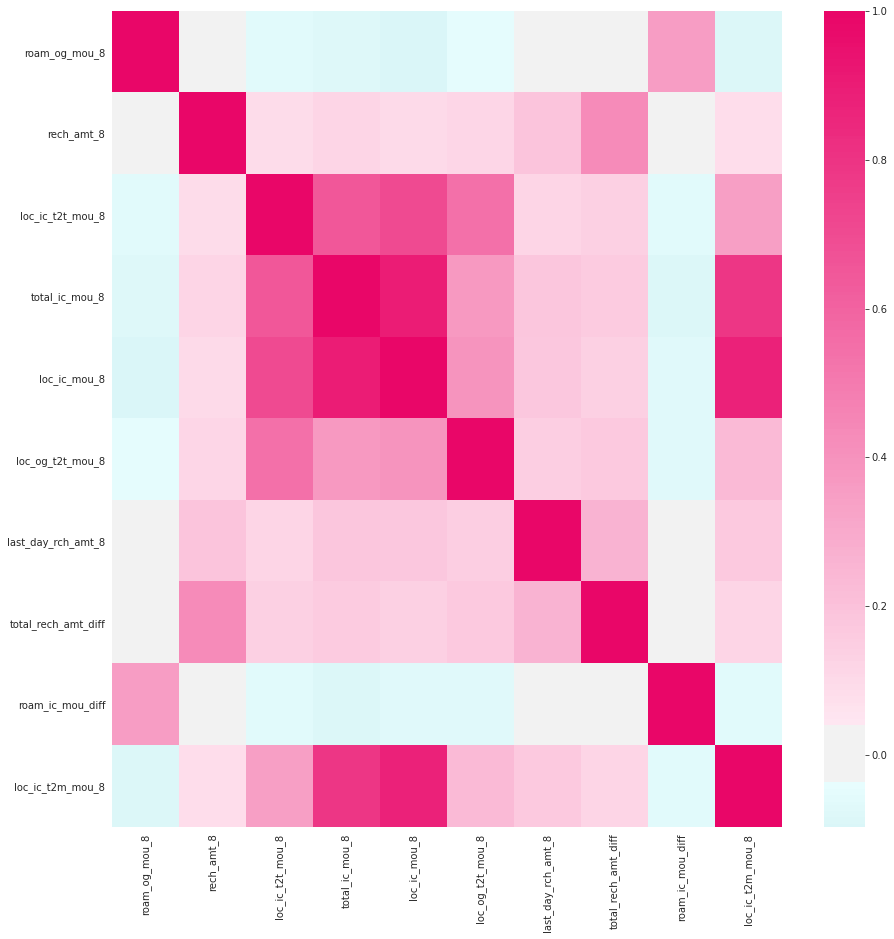

In [142]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,15)
mycmap = sns.diverging_palette(199, 359, s=99, center="dark", as_cmap=True)
sns.heatmap(data=X_tr_rfe[top_features].corr(), center=0.0, cmap=mycmap)

### Variables of Churn and Churn Analysis with Recommendation

1.  total_ic_mou_8	( Total incoming call in 8th Month)
2.	rech_amt_8	(Recharge amount in 8th Month , it is a derived feature -> total data recharge + total call recharge)
3.	roam_og_mou_8	( Roaming Outgoing in 8th MOnth)
4.	loc_ic_t2t_mou_8 ( Local incoming within same operator in 8th Month)
5.	total_og_mou_8	( Totaloutgoing call in 8th Month)
6.	max_rech_amt_8	 ( Maximum Recharge amount in 8th Month)
7.	last_day_rch_amt_8	 ( Last day reach amount in 8th Month)
8.	total_rech_amt_diff	 ( total diff in recharge amount , it is a derived feature -> total_rech 8-(total_rech 6+total_rech 7))
9.	loc_ic_mou_8	( Local incoming call in 8th month)
10.	loc_ic_t2m_mou_8	(Local incoming call to other operator mobile in 8th month)


##### Conclusion -

* Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
* Recharge amount difference btw month 8 and (6,7) for data and call  of Churn.
* Max Recharge Amount is a strong feature to predict churn.

Non-Interpretable Model :

* MODEL 1 - Regularized Logistic Regression with PCA ( Sensitivity 84% )
* MODEL 2 - Decision Tress with PCA ( Sensitivity 85% )
* MODEL 3 - Random Forest with PCA ( Sensitivity 83% )

Interpretable Model :

* MODEL 4 : RFE-Random Forest ( accuracy -94 % , ROC -93% )

#### Important factors that Telecom compnay should monitor is already mentioned above.

- Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using  current netwrok for few days.

- Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as cutomer may not be happy with the services he is getting that is why he started recharging with less amount.

- If data usage starts decreasing and in august month it is minimal then it shows customer is not getting good spped of internet.

- If internet speed that customer is getting is good, customer will finsh data soon and recharge it again but if network is poor and speed is not good then customer will not be able to finish it and will not recharge it multiple times. so need to look into areas where mnetwork is poor and customer care is receiving complaints multiple times.

- if all kinds of call and data usage reduces then it is serious concern as customer may be planning to churn and just timepassing for few more days. so company need to look into these ares.

- if customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.